<a href="https://colab.research.google.com/github/KESHAVNATH8/Machine-Learning-Project/blob/main/Exam_Mark_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/data[1].csv')

In [3]:
df

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19
...,...,...,...,...
196,8.56,19,1,84.68
197,8.94,20,1,86.75
198,6.60,15,1,78.05
199,8.35,16,1,83.50


In [4]:
df.head()

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19


In [5]:
df.tail()

,hours,age,internet,marks
196,8.56,19,1,84.68
197,8.94,20,1,86.75
198,6.60,15,1,78.05
199,8.35,16,1,83.50
200,4.15,15,0,81.45


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     196 non-null    float64
 1   age       201 non-null    int64  
 2   internet  201 non-null    int64  
 3   marks     201 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [7]:
df.describe()

,hours,age,internet,marks
count,196.000000,201.000000,201.000000,201.000000
mean,30.276378,17.467662,0.552239,77.951244
std,326.003104,1.720523,0.498505,4.919626
min,4.150000,15.000000,0.000000,68.570000
25%,5.782500,16.000000,0.000000,73.400000
50%,7.130000,17.000000,1.000000,77.770000
75%,8.095000,19.000000,1.000000,82.300000
max,4571.000000,20.000000,1.000000,86.990000


In [8]:
df.columns

Index(['hours', 'age', 'internet', 'marks'], dtype='object')

In [9]:
df.isnull().sum()

hours       5
age         0
internet    0
marks       0
dtype: int64

In [10]:
df.hours = df.hours.fillna(df.hours.mean())

In [11]:
df.isnull().sum()

hours       0
age         0
internet    0
marks       0
dtype: int64

In [12]:
df.hours


0       6.830000
1       6.560000
2      30.276378
3       5.670000
4       8.670000
         ...    
196     8.560000
197     8.940000
198     6.600000
199     8.350000
200     4.150000
Name: hours, Length: 201, dtype: float64

In [13]:
df.internet

0      1
1      0
2      1
3      0
4      1
      ..
196    1
197    1
198    1
199    1
200    0
Name: internet, Length: 201, dtype: int64

In [15]:
x = df.iloc[:,:-1]
y = df['marks']

In [16]:
x

,hours,age,internet
0,6.830000,15,1
1,6.560000,16,0
2,30.276378,17,1
3,5.670000,18,0
4,8.670000,19,1
...,...,...,...
196,8.560000,19,1
197,8.940000,20,1
198,6.600000,15,1
199,8.350000,16,1


Finding Outliers

In [64]:
mean = np.mean(df['hours'])
std = np.std(df['hours'])
z_scores = [(d - mean) / std for d in df.hours]
threshold = 3
outliers = df.hours[np.abs(z_scores) > threshold]
outliers

8    4571.0
Name: hours, dtype: float64

In [66]:
df.hours[8]

4571.0

In [17]:
y

0      78.50
1      76.74
2      78.68
3      71.82
4      84.19
       ...  
196    84.68
197    86.75
198    78.05
199    83.50
200    81.45
Name: marks, Length: 201, dtype: float64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:
print(x_test)

           hours  age  internet
18      8.410000   15         0
170     5.190000   17         0
107     5.720000   20         1
98      8.880000   17         0
177     5.790000   18         0
182     8.660000   17         0
5       7.550000   20         0
146     7.990000   17         1
12      7.750000   15         0
152     8.080000   17         1
61      7.260000   16         1
125     8.750000   20         0
180     6.970000   15         1
154     6.930000   19         1
80      8.340000   17         1
7       8.990000   16         0
33      8.780000   18         0
130     5.640000   19         0
37      7.190000   16         0
74      7.310000   17         0
183     8.610000   18         1
145     8.950000   16         0
45      6.180000   18         1
159     7.860000   18         0
60      5.490000   15         1
123     7.620000   18         0
179     7.260000   20         0
185     8.050000   20         0
122    30.276378   17         1
44      8.090000   17         0
16      

In [35]:
print(x_train)

     hours  age  internet
124   8.69   19         1
184   5.22   19         1
97    5.20   16         1
149   8.97   20         0
24    5.45   15         0
..     ...  ...       ...
67    8.26   16         0
192   8.71   15         1
117   8.83   18         1
47    5.01   20         0
172   7.35   19         1

[150 rows x 3 columns]


In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(x_test)

In [39]:
y_test

18     82.50
170    71.18
107    73.25
98     83.64
177    73.64
182    86.99
5      81.18
146    82.75
12     79.50
152    81.70
61     79.41
125    85.95
180    77.19
154    78.45
80     84.00
7      85.46
33     84.35
130    73.19
37     78.21
74     77.59
183    83.87
145    85.15
45     72.96
159    80.72
60     73.61
123    79.53
179    78.17
185    79.63
122    76.83
44     82.38
16     76.04
55     85.48
150    71.87
111    75.04
22     70.67
189    79.87
129    74.49
4      84.19
83     75.36
106    72.10
134    78.39
66     81.25
26     74.75
113    80.86
168    82.68
63     80.43
8      70.66
75     72.33
118    73.61
143    75.52
71     71.79
Name: marks, dtype: float64

In [40]:
y_pred

array([  77.82050109,   76.77597341,   77.38271428,   78.02934275,
         77.00437251,   77.95461613,   77.65138394,   78.0799596 ,
         77.59632121,   78.11052958,   77.80740386,   78.05898372,
         77.68430137,   77.76911153,   78.19884287,   78.04210686,
         78.01997531,   76.97802174,   77.43070718,   77.49606637,
         78.31515203,   78.0285202 ,   77.48976246,   77.70748214,
         77.18159497,   77.62596218,   77.55288065,   77.82121718,
         85.64989521,   77.76100623,   77.22258161,   78.29312694,
         76.7947083 ,   77.55429909,   77.13053853,   77.85660227,
         77.54071243,   78.36013122,   77.48121757,   77.22904181,
         77.5772532 ,   77.98660455,   77.22433317,   78.14017055,
         78.01717453,   78.01284885, 1627.98154463,   77.44220915,
         76.99500506,   77.29813079,   77.17551773])

In [46]:
value = [[6.83,151,1]]
Predicted_Rank = model.predict(value)
Predicted_Rank

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.98223989])

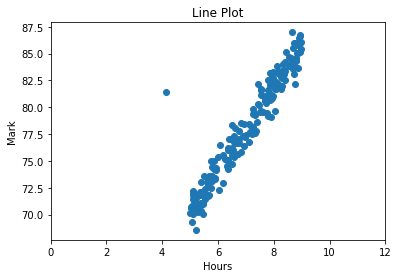

In [58]:
import matplotlib.pyplot as plt
plt.scatter(df['hours'], y)
plt.xlim(0, 12)
plt.xlabel('Hours')
plt.ylabel('Mark')
plt.title('Line Plot')
plt.show()
